In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

test_data = pd.read_csv("/content/test.csv")
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [2]:
# Checking missing values
print(test_data.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
# Checking missing values
print(test_data.isnull().sum())

# Represent missing values or drop columns/rows as needed
test_data['Age'].fillna(test_data['Age'].median(),inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Check for and drop duplicates
test_data.drop_duplicates(inplace=True)

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
# Summary

print(test_data.describe())

       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  418.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   29.599282    0.447368    0.392344   35.627188
std     120.810458    0.841838   12.703770    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   23.000000    0.000000    0.000000    7.895800
50%    1100.500000    3.000000   27.000000    0.000000    0.000000   14.454200
75%    1204.750000    3.000000   35.750000    1.000000    0.000000   31.500000
max    1309.000000    3.000000   76.000000    8.000000    9.000000  512.329200


In [8]:
#Value counts for categorical variables

print(test_data['Sex'].value_counts())
print(test_data['Pclass'].value_counts())

male      266
female    152
Name: Sex, dtype: int64
3    218
1    107
2     93
Name: Pclass, dtype: int64


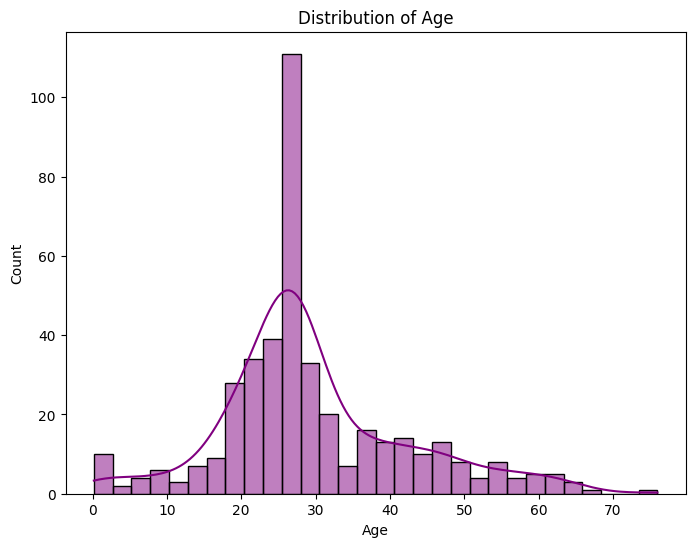

In [20]:
#Distribution of Age

plt.figure(figsize=(8,6))
sns.histplot(test_data['Age'], bins=30, kde=True, color="purple") #kde = kernel destiny estimation
plt.title("Distribution of Age")
plt.show()

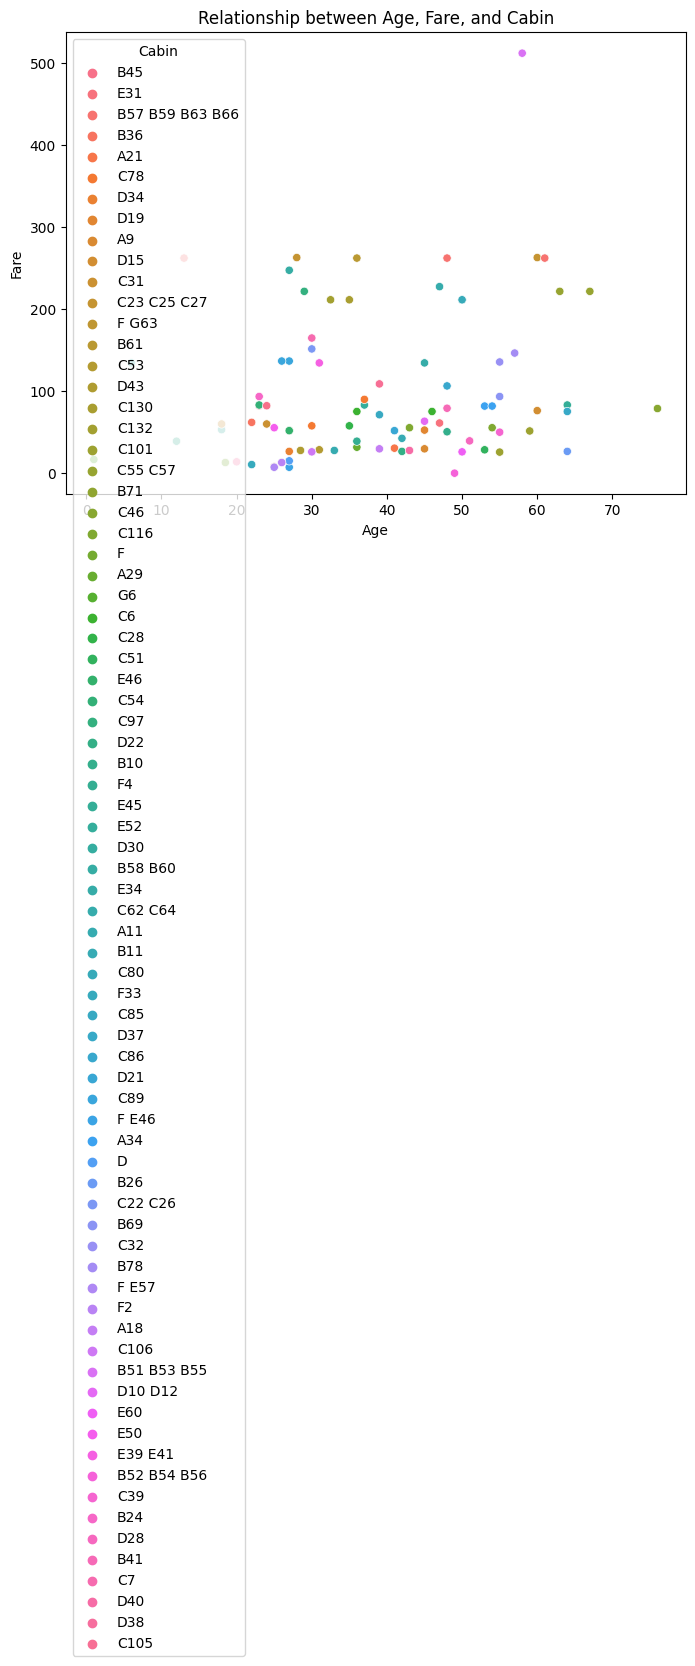

In [23]:
# Showing the relationship between variables (eg- age and fare)

plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', data=test_data, hue='Cabin')
plt.title('Relationship between Age, Fare, and Cabin')
plt.show()

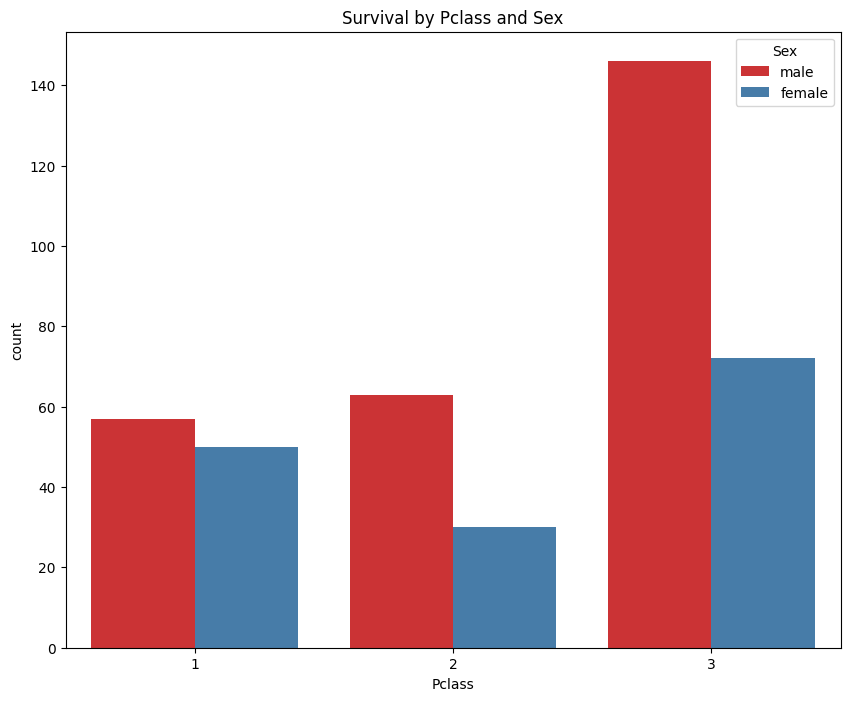

In [24]:
# Survival by Pclass and Sex
plt.figure(figsize=(10, 8))
sns.countplot(x='Pclass', hue='Sex', data=test_data, palette='Set1', hue_order=['male', 'female'])
plt.title('Survival by Pclass and Sex')
plt.show()

<ipython-input-25-4426dc1fe825>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')


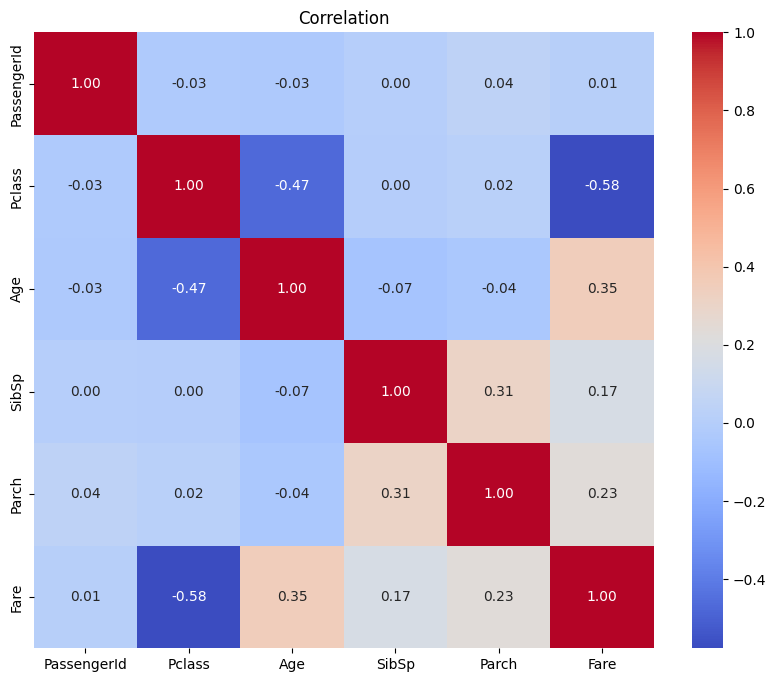

In [25]:
# Correlation
plt.figure(figsize=(10, 8))
sns.heatmap(test_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation')
plt.show()